In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load EEG data from CSV
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define the number of rows in each epoch (4 seconds)
epoch_length = 641

# Initialize lists to store epochs and labels
epochs = []
labels = []

# Extract EEG data and labels
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]
    if len(epoch) == epoch_length:
        eeg_epoch = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
        label = epoch.iloc[0, -1]  # Assuming the target is in the last column
        epochs.append(eeg_epoch)
        labels.append(label)

# Convert to NumPy arrays
epochs = np.array(epochs)
labels = np.array(labels)

# Perform label encoding for multi-class classification
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(epochs, labels_encoded, test_size=0.3, random_state=42)

# Define EEGNet architecture
model = keras.Sequential()
model.add(layers.Conv2D(8, (1, 64), input_shape=(epochs.shape[1], epochs.shape[2], 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(epochs.shape[1], 1), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(1, 16), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D(pool_size=(1, 4)))
model.add(layers.Dropout(0.5))
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(1, 4)))  # Adjust the pool_size as needed
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))  # 3 classes (Left, Right, Rest)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data to match the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/25
6/6 [==============================] - 10s 1s/step - loss: 1.2709 - accuracy: 0.3952 - val_loss: 1.0781 - val_accuracy: 0.5238
Epoch 2/25
6/6 [==============================] - 7s 1s/step - loss: 1.0950 - accuracy: 0.5150 - val_loss: 1.0731 - val_accuracy: 0.5238
Epoch 3/25
6/6 [==============================] - 7s 1s/step - loss: 1.0266 - accuracy: 0.5210 - val_loss: 1.0679 - val_accuracy: 0.5238
Epoch 4/25
6/6 [==============================] - 7s 1s/step - loss: 0.9434 - accuracy: 0.5689 - val_loss: 1.0648 - val_accuracy: 0.5238
Epoch 5/25
6/6 [==============================] - 7s 1s/step - loss: 0.8902 - accuracy: 0.6048 - val_loss: 1.0624 - val_accuracy: 0.5476
Epoch 6/25
6/6 [==============================] - 7s 1s/step - loss: 0.8365 - accuracy: 0.5629 - val_loss: 1.0621 - val_accuracy: 0.5476
Epoch 7/25
6/6 [==============================] - 7s 1s/step - loss: 0.8043 - accuracy: 0.6527 - val_loss: 1.0596 - val_accuracy: 0.5714
Epoch 8/25
6/6 [========================

Epoch 1/5
2/2 [==============================] - 1s 299ms/step - loss: 0.4108 - accuracy: 0.8889 - val_loss: 1.0029 - val_accuracy: 0.6000
Epoch 2/5
2/2 [==============================] - 2s 267ms/step - loss: 0.5488 - accuracy: 0.8333 - val_loss: 0.9999 - val_accuracy: 0.6000
Epoch 3/5
2/2 [==============================] - 2s 272ms/step - loss: 0.3936 - accuracy: 0.8889 - val_loss: 0.9964 - val_accuracy: 0.6000
Epoch 4/5
2/2 [==============================] - 1s 263ms/step - loss: 0.3149 - accuracy: 0.9167 - val_loss: 0.9925 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 1s 268ms/step - loss: 0.3573 - accuracy: 0.9167 - val_loss: 0.9890 - val_accuracy: 0.6000


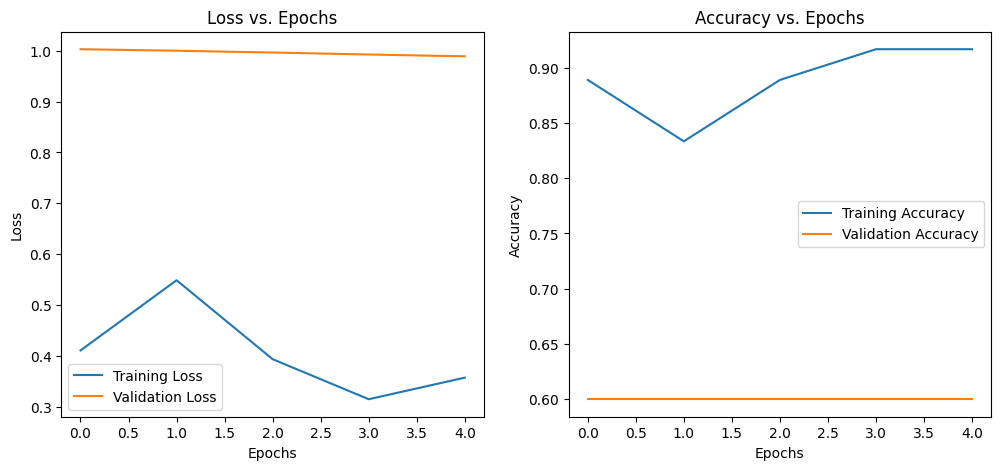

1/1 [==============================] - 0s 107ms/step - loss: 1.0393 - accuracy: 0.3889
Test Loss: 1.039332389831543, Test Accuracy: 0.3888888955116272
1/1 [==============================] - 0s 201ms/step
              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.43      0.30      0.35        10

    accuracy                           0.39        18
   macro avg       0.40      0.40      0.39        18
weighted avg       0.40      0.39      0.38        18



In [27]:
import matplotlib.pyplot as plt

# Train the model and collect the training history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Plot loss vs. accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# You can also print other classification metrics using scikit-learn, such as precision, recall, and F1 score.
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
print(classification_report(y_test, y_pred))


In [28]:
import pandas as pd
import numpy as np

# Load external EEG data from a CSV file
external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Test\Test_pred_R.csv")

# Assuming your external data contains the same structure as your training data
# Adjust the column selections accordingly
external_data = external_data.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

# Ensure the data shape matches the model's input shape
external_data = external_data.reshape(1, external_data.shape[0], external_data.shape[1], 1)

# Make predictions using the trained model
predictions = model.predict(external_data)

# Decode the predictions (if you used label encoding)
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Display the predictions
print("Predicted class:", decoded_predictions[0])


1/1 [==============================] - 0s 21ms/step
Predicted class: RIGHT


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your test data (e.g., X_test and y_test)
# X_test should be preprocessed and reshaped as shown in previous examples
# Load external EEG data from a CSV file
external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Test\Test_pred_R.csv")

# Assuming your external data contains the same structure as your training data
# Adjust the column selections accordingly
external_data = external_data.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

# Ensure the data shape matches the model's input shape
external_data = external_data.reshape(1, external_data.shape[0], external_data.shape[1], 1)

# Make predictions using the trained model
# predictions = model.predict(external_data)
# Make predictions on the test data
y_pred = model.predict(external_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode the true labels if you used label encoding
true_labels = label_encoder.inverse_transform(y_test)

# Decode the predicted labels if you used label encoding
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# Generate a classification report with accuracy, precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)
print(report)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=true_labels, yticklabels=true_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 21ms/step


ValueError: Found input variables with inconsistent numbers of samples: [36, 1]

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the external data from a CSV file (similar to your training data)
external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Test\Test_pred_R.csv")

# Assuming your data is already preprocessed and has the same shape (641 rows and channels) as your training data
# If not, you may need to apply the same preprocessing steps as before

# Perform any necessary preprocessing on the external data
# You should standardize (normalize) the data using the same scaler used during training
scaler = StandardScaler()  # Use the same scaler used during training
external_data = scaler.transform(external_data)

# Reshape the data to match the model's input shape
external_data = external_data.reshape(1, external_data.shape[0], external_data.shape[1], 1)

# Make predictions using the trained model
predictions = model.predict(external_data)

# Decode the predictions (if you used label encoding during training)
# For example, if you used label encoding for classes 'Left', 'Right', 'Rest':
label_mapping = {0: 'Left', 1: 'Right', 2: 'Rest'}
decoded_predictions = [label_mapping[np.argmax(pred)] for pred in predictions]

# Now you have the predictions for each epoch, and you can compare them to the true labels

# Load true labels (ground truth) for your external data, e.g., from another CSV file
true_labels = pd.read_csv('your_true_labels.csv')

# Assuming true labels are in the same format as decoded_predictions, you can create a classification report:
classification_rep = classification_report(true_labels, decoded_predictions)
print("Classification Report:\n", classification_rep)

# Calculate accuracy
accuracy = accuracy_score(true_labels, decoded_predictions)
print("Accuracy:", accuracy)

# Generate a confusion matrix and plot it as a heatmap
conf_matrix = confusion_matrix(true_labels, decoded_predictions, labels=['Left', 'Right', 'Rest'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Left', 'Right', 'Rest'],
            yticklabels=['Left', 'Right', 'Rest'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
import pandas as pd
import numpy as np

# Load external EEG data from a CSV file
external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\LR_Test.csv")

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store the predictions
all_predictions = []

# Iterate through the external data file, predicting one epoch at a time
for i in range(0, len(external_data), epoch_length):
    # Extract one epoch of data
    epoch_data = external_data.iloc[i:i + epoch_length, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

    # Ensure the data shape matches the model's input shape
    epoch_data = epoch_data.reshape(1, epoch_data.shape[0], epoch_data.shape[1], 1)

    # Make predictions using the trained model
    predictions = model.predict(epoch_data)

    # Decode the predictions (if you used label encoding)
    decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Append the predictions for this epoch to the list
    all_predictions.extend(decoded_predictions)

# Display all predictions
print("All Predictions:", all_predictions)


C:\Users\HP\AppData\Local\Temp\ipykernel_21100\1200226087.py:5: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\LR_Test.csv")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load external EEG data from a CSV file
external_data = pd.read_csv('your_external_data.csv')

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize lists to store true targets and predictions
true_targets = []
all_predictions = []

# Iterate through the external data file, predicting one epoch at a time
for i in range(0, len(external_data), epoch_length):
    # Extract one epoch of data
    epoch_data = external_data.iloc[i:i + epoch_length, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
    epoch_targets = external_data.iloc[i, -1]  # Assuming targets are in the last column and taken once for each epoch

    # Ensure the data shape matches the model's input shape
    epoch_data = epoch_data.reshape(1, epoch_data.shape[0], epoch_data.shape[1], 1)

    # Make predictions using the trained model
    predictions = model.predict(epoch_data)

    # Decode the predictions (if you used label encoding)
    decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Append the true target and predictions for this epoch
    true_targets.append(epoch_targets)
    all_predictions.extend(decoded_predictions)

# Create a DataFrame to display true targets and predictions
result_df = pd.DataFrame({'True Targets': true_targets, 'Predictions': all_predictions})

# Print the table of true targets and predictions
print(result_df)

# Calculate accuracy by comparing true targets to predictions
accuracy = accuracy_score(true_targets, all_predictions)
print("Accuracy:", accuracy)

# Determine if predictions and true targets match for each row
result_df['Match'] = result_df['True Targets'] == result_df['Predictions']

# Print if predictions and true targets match for each row
print(result_df)


1/1 [==============================] - 0s 30ms/step


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/depthwise_conv2d_10/depthwise' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_21100\4137306557.py", line 25, in <module>
      predictions = model.predict(epoch_data)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
      return self(x, training=False)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\depthwise_conv2d.py", line 162, in call
      outputs = backend.depthwise_conv2d(
    File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 6448, in depthwise_conv2d
      x = tf.nn.depthwise_conv2d(
Node: 'sequential_5/depthwise_conv2d_10/depthwise'
Computed output size would be negative: -224 [input_size: 416, effective_filter_size: 641, stride: 1]
	 [[{{node sequential_5/depthwise_conv2d_10/depthwise}}]] [Op:__inference_predict_function_41510]

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load external EEG data from a CSV file
external_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\LR_10_Test.csv")

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize lists to store true targets and predictions
true_targets = []
all_predictions = []

# Iterate through the external data file, predicting one epoch at a time
for i in range(0, len(external_data), epoch_length):
    # Extract one epoch of data
    epoch_data = external_data.iloc[i:i + epoch_length, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
    epoch_targets = external_data.iloc[i, -1]  # Assuming targets are in the last column and taken once for each epoch

    # Ensure the data shape matches the model's input shape
    epoch_data = epoch_data.reshape(1, epoch_data.shape[0], epoch_data.shape[1], 1)

    # Make predictions using the trained model
    predictions = model.predict(epoch_data)

    # Decode the predictions (if you used label encoding)
    decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Append the true target and predictions for this epoch
    true_targets.append(epoch_targets)
    all_predictions.extend(decoded_predictions)

# Create a DataFrame to display true targets and predictions
result_df = pd.DataFrame({'True Targets': true_targets, 'Predictions': all_predictions})

# Print the table of true targets and predictions
print(result_df)

# Calculate accuracy by comparing true targets to predictions
accuracy = accuracy_score(true_targets, all_predictions)
print("Accuracy:", accuracy)

# Determine if predictions and true targets match for each row
result_df['Match'] = result_df['True Targets'] == result_df['Predictions']

# Print if predictions and true targets match for each row
print(result_df)


1/1 [==============================] - 0s 21ms/step
   True Targets Predictions
0          REST        LEFT
1         RIGHT       RIGHT
2          REST        LEFT
3          LEFT        LEFT
4          REST       RIGHT
5          LEFT        LEFT
6          REST        REST
7         RIGHT        REST
8          REST        LEFT
9          LEFT        LEFT
10         REST        REST
11        RIGHT        REST
12         REST        REST
13        RIGHT        LEFT
14         REST        REST
15         LEFT        LEFT
16         REST        REST
17         LEFT        REST
18         REST       RIGHT
19        RIGHT        REST
20         REST        REST
21        RIGHT       RIGHT
22         REST       RIGHT
23         LEFT        REST
24         REST        REST
25        RIGHT       RIGHT
26         REST        REST
27         LEFT        REST
28         REST        LEFT
29        RIGHT       RIGHT
Accuracy: 0.5333333333333333
   True Targets Predictions  Match
0          REST 

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load EEG data from CSV
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\LR_only_10.csv")

# Define the number of rows in each epoch (4 seconds)
epoch_length = 641

# Initialize lists to store epochs and labels
epochs = []
labels = []

# Extract EEG data and labels
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]
    if len(epoch) == epoch_length:
        eeg_epoch = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
        label = epoch.iloc[0, -1]  # Assuming the target is in the last column
        epochs.append(eeg_epoch)
        labels.append(label)

# Convert to NumPy arrays
epochs = np.array(epochs)
labels = np.array(labels)

# Perform label encoding for multi-class classification
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(epochs, labels_encoded, test_size=0.3, random_state=42)

# Reshape data to match the input shape for EEGNet
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define EEGNet architecture
model = keras.Sequential()
model.add(layers.Conv2D(8, (1, 64), input_shape=(X_train.shape[1], X_train.shape[2], 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(X_train.shape[1], 1), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(1, 16), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D(pool_size=(1, 4)))
model.add(layers.Dropout(0.5))
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(1, 4)))  # Adjust the pool_size as needed
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))  # 3 classes (Left, Right, Rest)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/25
6/6 [==============================] - 9s 1s/step - loss: 1.3456 - accuracy: 0.4311 - val_loss: 1.0791 - val_accuracy: 0.5476
Epoch 2/25
6/6 [==============================] - 7s 1s/step - loss: 1.1339 - accuracy: 0.4371 - val_loss: 1.0727 - val_accuracy: 0.5238
Epoch 3/25
6/6 [==============================] - 7s 1s/step - loss: 1.0184 - accuracy: 0.5629 - val_loss: 1.0685 - val_accuracy: 0.5238
Epoch 4/25
6/6 [==============================] - 7s 1s/step - loss: 0.9924 - accuracy: 0.5329 - val_loss: 1.0645 - val_accuracy: 0.5238
Epoch 5/25
6/6 [==============================] - 7s 1s/step - loss: 0.9589 - accuracy: 0.5808 - val_loss: 1.0616 - val_accuracy: 0.5238
Epoch 6/25
6/6 [==============================] - 8s 1s/step - loss: 0.8922 - accuracy: 0.5150 - val_loss: 1.0589 - val_accuracy: 0.5238
Epoch 7/25
6/6 [==============================] - 9s 1s/step - loss: 0.8157 - accuracy: 0.6407 - val_loss: 1.0544 - val_accuracy: 0.5238
Epoch 8/25
6/6 [=========================